<a href="https://colab.research.google.com/github/EduardoMoraesRitter/introducao_Deep_Learning_keras_tensorflow/blob/master/deep_learning_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

introdutório de  Deep Learning é uma subcategoria do Machine Learning:

*   Deep Learning se baseia em duas coisas: vetores e tensores

*   biblioteca do Google especializada em Redes Neurais Profundas chamada TensorFlow, usando API alto nível que está acima do TensorFlow o Keras foi construído em cima de uma outra biblioteca chamada Theano.

*   dataset chamado Fashion-MNIST organizado com imagens de várias roupas diferentes. https://github.com/zalandoresearch/fashion-mnist

*   visualizar a imagem usando matplotlib.pyplot

*   nosso modelo tem 3 camadas

    1.   camada 0 que está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels. array de 2 dimensões e achatando-o para que fique com uma dimensão única usando Flatten

    2.   camada 1, A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. TensorFlow  múltiplo de 2






A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.


In [0]:
#keras esta dentro do tensorflow
import tensorflow
from tensorflow import keras

In [0]:
#pegar o dataset
dataset = keras.datasets.fashion_mnist

In [3]:
#carregar dados
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#imagens de treino
len(imagens_treino)

60000

In [5]:
#uma imagem de 28 por 28 as dimencoes
imagens_treino.shape

(60000, 28, 28)

In [0]:
#visualizar a imagem
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

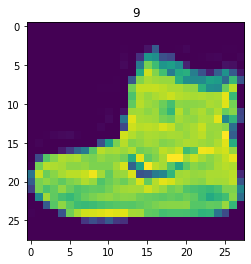

In [7]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [8]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

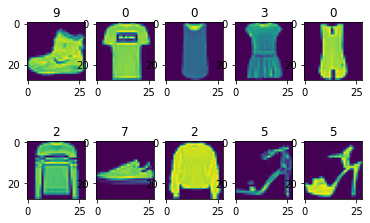

In [9]:
#loop para mostrar algumas fotos
for i in range(10):
  #quando colocamos mais de um grafico precisamos colocar um subgrafico, passando 2 linhas e 5 colunas
  plt.subplot(2,5,i+1)
  plt.imshow(imagens_treino[i])
  plt.title(identificacoes_treino[i])

In [10]:
nome_classificacoes = ['camiseta','calsa','pullover','cestido','casaco',
                       'sandalia','camisa','tenis','bolsa','bota']
nome_classificacoes

['camiseta',
 'calsa',
 'pullover',
 'cestido',
 'casaco',
 'sandalia',
 'camisa',
 'tenis',
 'bolsa',
 'bota']

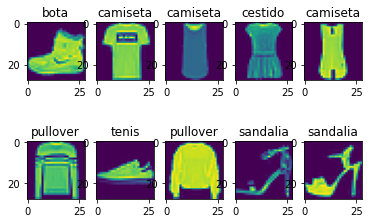

In [11]:
#loop para mostrar algumas fotos
for i in range(10):
  #quando colocamos mais de um grafico precisamos colocar um subgrafico, passando 2 linhas e 5 colunas
  plt.subplot(2,5,i+1)
  plt.imshow(imagens_treino[i])
  plt.title(nome_classificacoes[identificacoes_treino[i]])

#Criando o modelo
---
camadas(layers) da rede neural

modelo > entrada > processamento > saida

temos  >    56    >       256     >   10  






In [12]:
#camada 0(Flatten) um achatamento transformando imagens de 28x28 pixel em 56 dimencoes
#camada 1(Dense) camada profunca, sempre multiplo de 2 para numero de NOS e activation ReLU - funcao nao linear transforma negativo em 0 
#camada 2(softmax), Softmax e multicamadas, descreve a 
modelo1 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

#compliar o modelo, passando o otimizado(adam para valizar classes) e percar de informação(Entropia Cruzada Categórica Esparsa)
modelo1.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo1.fit(imagens_treino, identificacoes_treino)
#saida vemos:
#epoch(épocas um ciculo) é quantas vezes passamos por cada uma das imagen;
#quantidade de imagens
#loss(perca) de 3,5% temos que ter o minimo possivel

1875/1875 [==============================] - 5s 2ms/step - loss: 3.6561


graduacao de cores sao as dimencoes 0 a 255. 

#normalizacao

transformar as imagens de 0 a 255 para 0 e 1

diminuir as variacoes de cores converter para 0 e 1 e esses valores do meio podem ser 0.1, 0.4, 0.6 ...

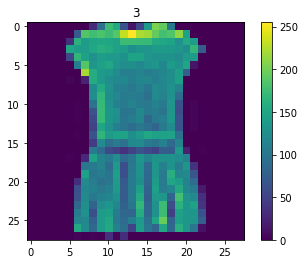

In [20]:
plt.imshow(imagens_treino[3])
plt.title(identificacoes_treino[3])
plt.colorbar()

In [21]:
#normalizar os dados, esse print é da primeira linha so
print("original: ", imagens_treino[3][0])
imagens_treino_normalizado = imagens_treino/float(255)
print("\n\n normalizado: ", imagens_treino_normalizado[3][0])

original:  [  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
 102   0   0   0   0   0   0   0   0   0]


 normalizado:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.12941176 0.37647059 0.68627451 0.61176471
 0.25098039 0.05490196 0.21176471 0.5372549  0.8        0.76078431
 0.4        0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


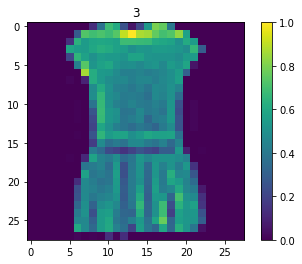

In [22]:
#a escala nao muda oq muda é o valor e nao tem perda na imagem
plt.imshow(imagens_treino_normalizado[3])
plt.title(identificacoes_treino[3])
plt.colorbar()

In [16]:
#usando imagens normalizadas
#agora com 3 camadas 56 > 256 > 128 > 10
modelo2 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo2.fit(imagens_treino_normalizado, identificacoes_treino)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4818


dimunuir a rede com outra camada, camada oculta

In [17]:
#agora com 4 camadas 56 > 256 > 128 > 10
modelo3 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(128, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo3.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo3.fit(imagens_treino_normalizado, identificacoes_treino)
#demoro mais por conta da nova camada
#teve uma perca a mais

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4726


In [18]:
#agora com 5 camadas 56 > 256 > 128 > 64 > 10
modelo4 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(128, activation=tensorflow.nn.relu),
                           keras.layers.Dense(64, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo4.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo4.fit(imagens_treino_normalizado, identificacoes_treino)
#demoro mais por conta da nova camada
#teve uma perca a mais

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4827


In [19]:
#agora com 4 camadas 56 > 64 > 10
modelo5 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(64, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo5.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo5.fit(imagens_treino_normalizado, identificacoes_treino)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.5262


#Para saber mais


Para fazer essas transformações, precisamos explorar os dados como fazemos no curso com o pyplot do matplotlib, e usar também uma biblioteca como a scipy do Python que tem um módulo chamado ndimage apenas para lidar com imagens.

from scipy import ndimage

http://scipy-lectures.org/advanced/image_processing/